In [34]:
# import os
# import pprint
# import tensorflow as tf

# if 'COLAB_TPU_ADDR' not in os.environ:
#   print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
# else:
#   tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
#   print ('TPU address is', tpu_address)

#   with tf.compat.v1.Session(tpu_address) as session:
#     devices = session.list_devices()
    
#   print('TPU devices:')
#   pprint.pprint(devices)

%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.2.0
Running on TPU  ['10.55.44.170:8470']


INFO:tensorflow:Initializing the TPU system: grpc://10.55.44.170:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.55.44.170:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [1]:
from math import sqrt

import pandas as pd
import numpy as np
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/rosen-mark-projects/recommender-systems-project/master/Data/train.csv', names=['user_id', 'profile_id', 'rating']).astype(int)
test = pd.read_csv('https://raw.githubusercontent.com/rosen-mark-projects/recommender-systems-project/master/Data/test.csv', names=['user_id', 'profile_id', 'rating']).astype(int)

In [3]:
train

,user_id,profile_id,rating
0,0,1067,3
1,0,1575,1
2,0,653,1
3,0,1693,4
4,0,1296,6
...,...,...,...
82496,1999,715,4
82497,1999,297,1
82498,1999,1289,6
82499,1999,148,1


# Matrix factorization

In [4]:
train.rating = train.rating / 10
test.rating = test.rating / 10
test

,user_id,profile_id,rating
0,0,1826,1.0
1,0,300,0.8
2,0,1215,0.7
3,0,76,0.8
4,0,842,0.1
...,...,...,...
27517,1999,763,0.9
27518,1999,280,0.5
27519,1999,1615,0.4
27520,1999,1585,0.6


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


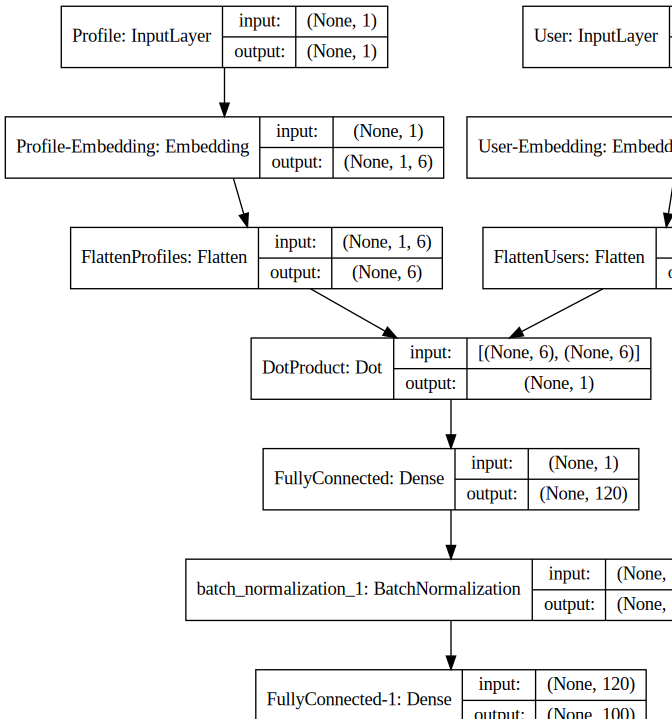

In [5]:
n_users, n_profiles = max(train.user_id.unique()), max(train.profile_id.unique())
n_latent_factors = 6

profile_input = keras.layers.Input(shape=[1],name='Profile')
profile_embedding = keras.layers.Embedding(n_profiles + 1, n_latent_factors, name='Profile-Embedding')(profile_input)
profile_vec = keras.layers.Flatten(name='FlattenProfiles')(profile_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)

prod = keras.layers.dot([profile_vec, user_vec],axes=1, name= 'DotProduct')

dense_1 = keras.layers.Dense(120, activation='relu', name='FullyConnected')(prod)
bn_1 = keras.layers.BatchNormalization()(dense_1)

dense_2 = keras.layers.Dense(100, activation='relu', name='FullyConnected-1')(bn_1)
bn_2 = keras.layers.BatchNormalization()(dense_2)

result = keras.layers.Dense(1, activation='sigmoid',name='Activation')(bn_2)

model = keras.Model([user_input, profile_input], result)
model.compile('adam', 'mean_squared_error')

SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [6]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Profile (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Profile-Embedding (Embedding)   (None, 1, 6)         12000       Profile[0][0]                    
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 6)         12000       User[0][0]                       
____________________________________________________________________________________________

In [7]:
history = model.fit([train['user_id'], train['profile_id']], train['rating'], epochs=50, verbose=1)


Epoch 1/50
82501/82501 [==============================] - 5s 64us/step - loss: 0.0814
Epoch 2/50
82501/82501 [==============================] - 5s 56us/step - loss: 0.0657
Epoch 3/50
82501/82501 [==============================] - 5s 55us/step - loss: 0.0595
Epoch 4/50
82501/82501 [==============================] - 4s 54us/step - loss: 0.0553
Epoch 5/50
82501/82501 [==============================] - 4s 54us/step - loss: 0.0523
Epoch 6/50
82501/82501 [==============================] - 4s 48us/step - loss: 0.0496
Epoch 7/50
82501/82501 [==============================] - 5s 58us/step - loss: 0.0463
Epoch 8/50
82501/82501 [==============================] - 6s 73us/step - loss: 0.0439
Epoch 9/50
82501/82501 [==============================] - 5s 58us/step - loss: 0.0424
Epoch 10/50
82501/82501 [==============================] - 5s 55us/step - loss: 0.0409
Epoch 11/50
82501/82501 [==============================] - 4s 53us/step - loss: 0.0398
Epoch 12/50
82501/82501 [==========================

Text(0, 0.5, 'Train Error')

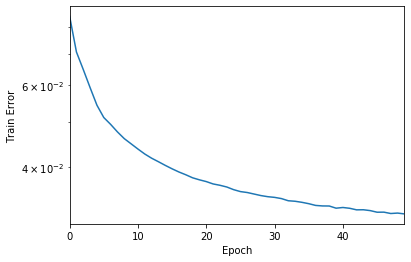

In [8]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [9]:
model.save('mf-model')

In [10]:
y_hat = np.round(model.predict([test.user_id, test.profile_id]) * 10, 0)
y_true = test.rating * 10

In [11]:
y_true

0        10.0
1         8.0
2         7.0
3         8.0
4         1.0
         ... 
27517     9.0
27518     5.0
27519     4.0
27520     6.0
27521     2.0
Name: rating, Length: 27522, dtype: float64

In [17]:
sqrt(mean_squared_error(y_true, y_hat))

2.61681520603614

In [14]:
loaded_model = load_model('mf-model')

In [18]:
y_hat = np.round(loaded_model.predict([test.user_id, test.profile_id]) * 10, 0)

sqrt(mean_squared_error(y_true, y_hat))

2.61681520603614